In [83]:
import tensorflow as tf
from tensorflow.keras import layers
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_style('darkgrid')

In [84]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/Concrete_Data.xls"

df = pd.read_excel(url)

In [85]:
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


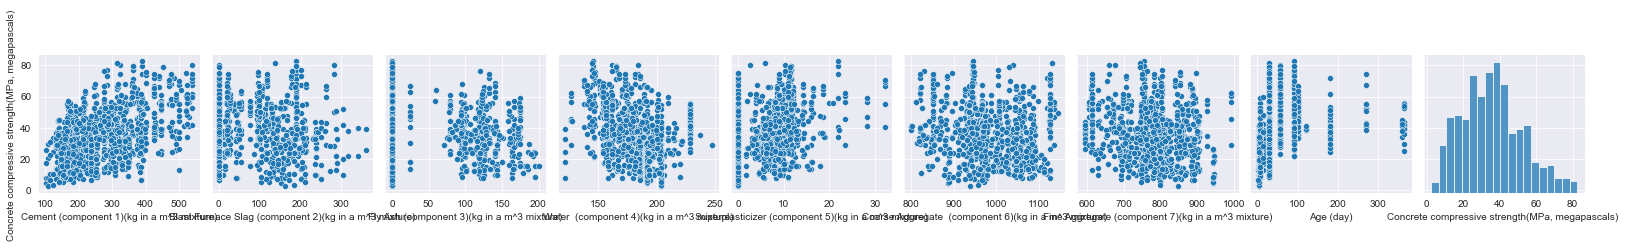

In [93]:
sns.pairplot(df, y_vars=df.iloc[:, -1:].columns)

In [94]:
train_df = df.sample(frac=0.8, random_state=42)
test_df = df.drop(train_df.index)

In [95]:
train_X = train_df.iloc[:, :-1]
train_y = train_df.iloc[:, -1]

In [96]:
test_X = test_df.iloc[:, :-1]
test_y = test_df.iloc[:, -1]

In [108]:
water_train = np.array(train_df.iloc[:, 3])
water_test = np.array(test_df.iloc[:, 3])

In [104]:
simple_normalizer = layers.Normalization(axis=-1)

In [105]:
simple_normalizer.adapt(train_X.iloc[:, 3:5])

In [107]:
train_X.iloc[:, 3:4]

,Water (component 4)(kg in a m^3 mixture)
31,228.00
109,164.90
136,145.90
88,164.90
918,202.00
...,...
472,162.00
347,154.79
505,201.00
639,187.00


In [106]:
linear_model = tf.keras.Sequential([
    simple_normalizer,
    layers.Dense(1)
])

linear_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_4 (Normalizat  (None, 2)                5         
 ion)                                                            
                                                                 
 dense_6 (Dense)             (None, 1)                 3         
                                                                 
Total params: 8
Trainable params: 3
Non-trainable params: 5
_________________________________________________________________


In [80]:
linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=.01),
    loss=tf.keras.losses.MeanSquaredError())

In [81]:
linear_model.fit(train_X, train_y, epochs=100)

Epoch 1/100
13/13 [==============================] - 0s 2ms/step - loss: 4.1752
Epoch 2/100
13/13 [==============================] - 0s 2ms/step - loss: 3.4367
Epoch 3/100
13/13 [==============================] - 0s 2ms/step - loss: 3.0116
Epoch 4/100
13/13 [==============================] - 0s 2ms/step - loss: 2.7088
Epoch 5/100
13/13 [==============================] - 0s 2ms/step - loss: 2.5146
Epoch 6/100
13/13 [==============================] - 0s 2ms/step - loss: 2.3557
Epoch 7/100
13/13 [==============================] - 0s 2ms/step - loss: 2.2380
Epoch 8/100
13/13 [==============================] - 0s 2ms/step - loss: 2.1582
Epoch 9/100
13/13 [==============================] - 0s 2ms/step - loss: 2.1058
Epoch 10/100
13/13 [==============================] - 0s 2ms/step - loss: 2.0654
Epoch 11/100
13/13 [==============================] - 0s 2ms/step - loss: 2.0375
Epoch 12/100
13/13 [==============================] - 0s 2ms/step - loss: 2.0157
Epoch 13/100
13/13 [=================

In [26]:
train_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 414 entries, 213 to 397
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       414 non-null    int64  
 1   Y       414 non-null    int64  
 2   month   414 non-null    int64  
 3   day     414 non-null    int64  
 4   FFMC    414 non-null    float64
 5   DMC     414 non-null    float64
 6   DC      414 non-null    float64
 7   ISI     414 non-null    float64
 8   temp    414 non-null    float64
 9   RH      414 non-null    int64  
 10  wind    414 non-null    float64
 11  rain    414 non-null    float64
dtypes: float64(7), int64(5)
memory usage: 42.0 KB
